In [10]:
import pdb
import sys
import argparse

import numpy as np

sys.path.insert(0, '../../../figures')
import matplotlib.pyplot as plt
import plot_utils as pu
import color_scheme as cs

Load full network simulation

In [11]:
data = np.load("data/data_network.npy", allow_pickle=True)
m_net, M_net = data

Load mean field simulation

In [12]:
data = np.load("data/data_theory.npy", allow_pickle=True)
m, M, C = data

Plot

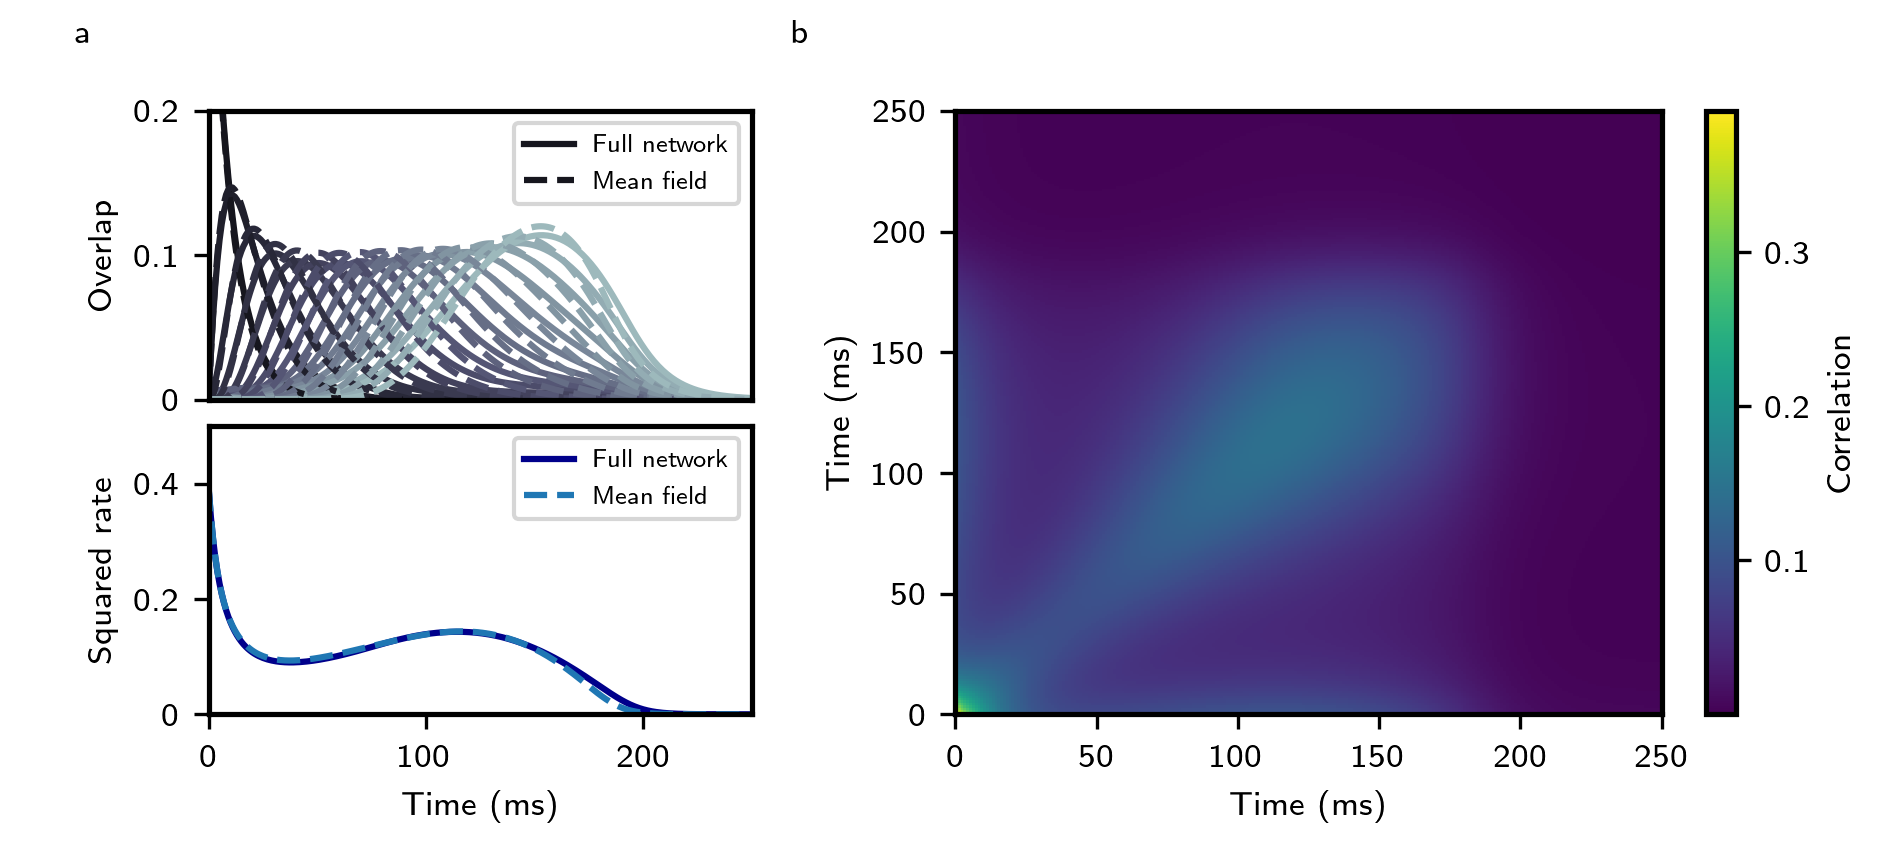

In [16]:
pu.figure_setup()
fig_size = pu.get_fig_size(17.8, 7)
fig = plt.figure(figsize=fig_size)

ax1 = plt.subplot2grid((12, 24), (0, 0), rowspan=6, colspan=8)
ax2 = plt.subplot2grid((12, 24), (6, 0), rowspan=6, colspan=8)
ax3 = plt.subplot2grid((12, 24), (0, 11), rowspan=12, colspan=14)

ax1.annotate("a", xy=(0.04,0.95), xycoords='figure fraction', fontsize=8)
ax3.annotate("b", xy=(0.42,0.95), xycoords='figure fraction', fontsize=8)

colors = cs.overlap_colors(len(m))

# Network
for overlap, c in zip(m_net, colors):
    line2 = ax1.plot(overlap, color=c, linestyle='solid')
ax2.plot(M_net, color='darkblue', linestyle='solid')

# Theory
for overlap, c in zip(m, colors):
    line1 = ax1.plot(overlap, color=c, linestyle='dashed')
ax2.plot(M, linestyle='dashed')
im = ax3.pcolormesh(C, rasterized=True)
cbar = plt.colorbar(im)
cbar.set_label("Correlation")
cbar.set_ticks([0,0.1,0.2,0.3])
cbar.set_ticklabels([0,0.1,0.2,0.3])

ax1.set_xticks([])

ax1.set_xlim([0,250])
ax1.set_ylim([0,0.2])
ax1.set_yticks([0,0.1,0.2])
ax1.set_yticklabels([0,0.1,0.2])
ax1.set_ylabel("Overlap")
ax1.legend([ax1.lines[0], ax1.lines[16]], ["Full network", "Mean field"])

ax2.set_xlim([0,250])
ax2.set_ylim([0,0.5])
ax2.set_xticks([0,100,200])
ax2.set_xticklabels([0,100,200])
ax2.set_xlabel("Time (ms)")
ax2.set_yticks([0,0.2,0.4])
ax2.set_yticklabels([0,0.2,0.4])
ax2.set_ylabel("Squared rate")
ax2.legend(["Full network", "Mean field"])

ax3.set_xlabel("Time (ms)")
ax3.set_ylabel("Time (ms)")
ax3.set_xticks([0,50,100,150,200,250])
ax3.set_xticklabels([0,50,100,150,200,250])
ax3.set_yticks([0,50,100,150,200,250])
ax3.set_yticklabels([0,50,100,150,200,250])

plt.subplots_adjust(wspace=0, hspace=1, bottom=0.15)
plt.savefig("../output/5.pdf", dpi=300, bbox_inches='tight');